## Crude Oil

### Weekly

XGBoost RMSE: 1.684495384129487
XGBoost Accuracy: 99.76%


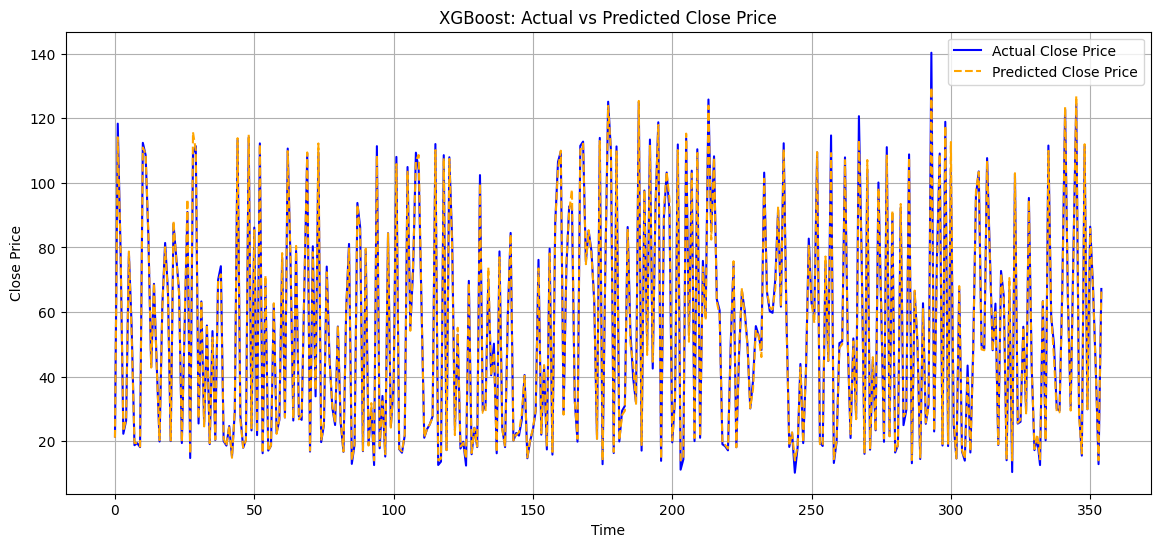

Future Close Prices with Dates (Lagged Fix):
        Date  Predicted Close
0 2024-09-08        72.916419
1 2024-09-15        96.996979
2 2024-09-22        83.056491
3 2024-09-29        82.689423
4 2024-10-06        81.566788


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from math import sqrt
from datetime import timedelta

# Load and preprocess the dataset
file_path = "brent_crude_oil_atr_ema_rsi_w.csv"  
df = pd.read_csv(file_path)

# Drop missing values
df = df.dropna()

# Convert Date column to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

# Feature-target split
X = df.drop(columns=['Close'])  # Features
y = df['Close']  # Target

# Scale the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = XGBRegressor(
    objective="reg:squarederror",
    n_estimators=500,           # Increase trees, but use early stopping
    learning_rate=0.01,         # Lower learning rate → slower learning, better generalization
    max_depth=3,                # Shallower trees = less complexity
    subsample=0.6,              # Less data per tree = more regularization
    colsample_bytree=0.6,       # Use fewer features per tree
    reg_alpha=0.5,              # L1 regularization
    reg_lambda=1.0,             # L2 regularization
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_scaled = xgb_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Evaluation Metrics
rmse = sqrt(mean_squared_error(y_test_rescaled, y_pred))
accuracy = r2_score(y_test_rescaled, y_pred) * 100

print(f"XGBoost RMSE: {rmse}")
print(f"XGBoost Accuracy: {accuracy:.2f}%")

# Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled, label='Actual Close Price', color='blue')
plt.plot(y_pred, label='Predicted Close Price', color='orange', linestyle='--')
plt.title("XGBoost: Actual vs Predicted Close Price")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()

# Predict future values with dynamic updates
def predict_future_xgb_lagged(model, data, steps, scaler_X, scaler_y, original_df):
    """
    Predicts future values using XGBoost with dynamic lagged feature updates.
    """
    future_predictions = []
    last_sequence = data[-1].copy()  # Start with the last row of scaled data

    for _ in range(steps):
        # Predict the next value
        next_pred_scaled = model.predict(last_sequence.reshape(1, -1))[0]
        next_pred = scaler_y.inverse_transform([[next_pred_scaled]])[0, 0]
        future_predictions.append(next_pred)

        # Update the features dynamically (shift the sequence and add the new prediction)
        last_sequence = np.roll(last_sequence, -1)  # Shift features
        last_sequence[-1] = next_pred_scaled  # Insert the predicted value as the new feature

    return future_predictions

# Generate future dates
last_date = df.index[-1]  # Get the last available date
future_steps = 5
future_dates = [last_date + timedelta(weeks=i) for i in range(1, future_steps + 1)]

# Predict next 5 weeks
future_prices_lagged = predict_future_xgb_lagged(xgb_model, X_scaled, future_steps, scaler_X, scaler_y, df)

# Prepare DataFrame for future predictions
future_df_lagged = pd.DataFrame({
    'Date': future_dates,
    'Predicted Close': future_prices_lagged
})

print("Future Close Prices with Dates (Lagged Fix):")
print(future_df_lagged)


### Monthly

XGBoost RMSE: 2.951162086601382
XGBoost Accuracy: 99.22%


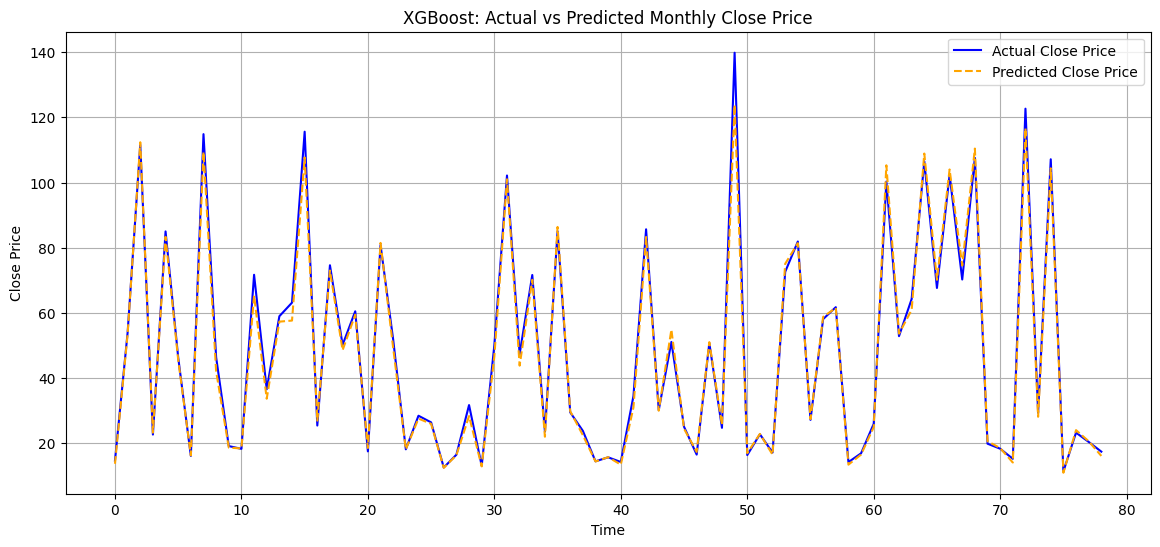

Future Monthly Close Prices with Dates:
        Date  Predicted Close
0 2024-11-01        73.167276
1 2024-12-01        98.177345
2 2025-01-01        80.450418
3 2025-02-01        71.004673
4 2025-03-01        81.508889


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from math import sqrt
from dateutil.relativedelta import relativedelta  # Import for monthly increments

# Load and preprocess the dataset
file_path = "brent_crude_oil_atr_ema_rsi_m2.csv" 
df = pd.read_csv(file_path)

# Drop missing values
df = df.dropna()

# Convert Date column to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

# Feature-target split
X = df.drop(columns=['Close'])  # Features
y = df['Close']  # Target

# Scale the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = XGBRegressor(
    objective="reg:squarederror", 
    n_estimators=500, 
    learning_rate=0.05, 
    max_depth=5, 
    subsample=0.8, 
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_scaled = xgb_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Evaluation Metrics
rmse = sqrt(mean_squared_error(y_test_rescaled, y_pred))
accuracy = r2_score(y_test_rescaled, y_pred) * 100

print(f"XGBoost RMSE: {rmse}")
print(f"XGBoost Accuracy: {accuracy:.2f}%")

# Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled, label='Actual Close Price', color='blue')
plt.plot(y_pred, label='Predicted Close Price', color='orange', linestyle='--')
plt.title("XGBoost: Actual vs Predicted Monthly Close Price")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()

# Predict future values with dynamic updates
def predict_future_xgb_lagged(model, data, steps, scaler_X, scaler_y):
    """
    Predicts future values using XGBoost with dynamic lagged feature updates.
    """
    future_predictions = []
    last_sequence = data[-1].copy()  # Start with the last row of scaled data

    for _ in range(steps):
        # Predict the next value
        next_pred_scaled = model.predict(last_sequence.reshape(1, -1))[0]
        next_pred = scaler_y.inverse_transform([[next_pred_scaled]])[0, 0]
        future_predictions.append(next_pred)

        # Update the features dynamically (shift the sequence and add the new prediction)
        last_sequence = np.roll(last_sequence, -1)  # Shift features
        last_sequence[-1] = next_pred_scaled  # Insert the predicted value as the new feature

    return future_predictions

# Generate future dates
last_date = df.index[-1]  # Get the last available date
future_steps = 5  # Predicting for the next 5 months
future_dates = [last_date + relativedelta(months=i) for i in range(1, future_steps + 1)]

# Predict next 5 months
future_prices_lagged = predict_future_xgb_lagged(xgb_model, X_scaled, future_steps, scaler_X, scaler_y)

# Prepare DataFrame for future predictions
future_df_lagged = pd.DataFrame({
    'Date': future_dates,
    'Predicted Close': future_prices_lagged
})

print("Future Monthly Close Prices with Dates:")
print(future_df_lagged)


## Carbon Black

### Monthly

XGBoost RMSE: 14.940860364823315
XGBoost Accuracy: 99.64%


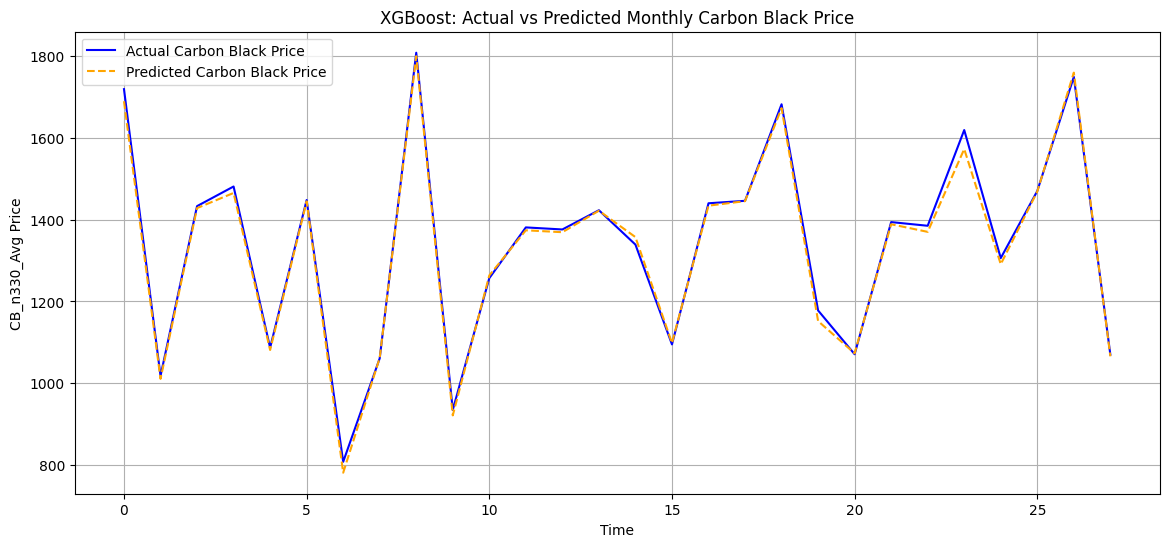

Future Monthly Carbon Black Prices with Dates:
        Date  Predicted Carbon Black Price
0 2023-09-01                   1800.724058
1 2023-10-01                   1659.241824
2 2023-11-01                   1494.081805
3 2023-12-01                   1714.118098
4 2024-01-01                   1605.541253


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from math import sqrt
from dateutil.relativedelta import relativedelta  # For monthly increments

#  Load and preprocess the dataset
file_path = "Carbon_Black_Historical_Data2.csv"  
df = pd.read_csv(file_path)

#  Drop missing values
df = df.dropna()

#  Convert Date column to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

#  Feature-target split
X = df.drop(columns=['CB_n330_Avg'])  # Features
y = df['CB_n330_Avg']  # Target (Carbon Black price)

#  Scale the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

#  Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

#  Train the XGBoost model
xgb_model = XGBRegressor(
    objective="reg:squarederror", 
    n_estimators=150, 
    learning_rate=0.05, 
    max_depth=5, 
    subsample=0.8, 
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_scaled = xgb_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

#  Evaluation Metrics
rmse = sqrt(mean_squared_error(y_test_rescaled, y_pred))
accuracy = r2_score(y_test_rescaled, y_pred) * 100

print(f"XGBoost RMSE: {rmse}")
print(f"XGBoost Accuracy: {accuracy:.2f}%")

#  Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled, label='Actual Carbon Black Price', color='blue')
plt.plot(y_pred, label='Predicted Carbon Black Price', color='orange', linestyle='--')
plt.title("XGBoost: Actual vs Predicted Monthly Carbon Black Price")
plt.xlabel("Time")
plt.ylabel("CB_n330_Avg Price")
plt.legend()
plt.grid()
plt.show()

#  Predict future values dynamically
def predict_future_xgb_lagged(model, data, steps, scaler_X, scaler_y):
    """
    Predicts future Carbon Black prices using XGBoost with dynamic lag updates.
    """
    future_predictions = []
    last_sequence = data[-1].copy()  # Start with the last row of scaled data

    for _ in range(steps):
        # Predict the next value
        next_pred_scaled = model.predict(last_sequence.reshape(1, -1))[0]
        next_pred = scaler_y.inverse_transform([[next_pred_scaled]])[0, 0]
        future_predictions.append(next_pred)

        # Update the features dynamically (shift the sequence and add the new prediction)
        last_sequence = np.roll(last_sequence, -1)  # Shift features
        last_sequence[-1] = next_pred_scaled  # Insert the predicted value as the new feature

    return future_predictions

# Generate future dates
last_date = df.index[-1]  # Get the last available date
future_steps = 5  # Predicting for the next 5 months
future_dates = [last_date + relativedelta(months=i) for i in range(1, future_steps + 1)]

# Predict next 5 months
future_prices_lagged = predict_future_xgb_lagged(xgb_model, X_scaled, future_steps, scaler_X, scaler_y)

# Prepare DataFrame for future predictions
future_df_lagged = pd.DataFrame({
    'Date': future_dates,
    'Predicted Carbon Black Price': future_prices_lagged
})

print("Future Monthly Carbon Black Prices with Dates:")
print(future_df_lagged)
